<a href="https://colab.research.google.com/github/pramodcgupta/Machine-Learning-Predictions/blob/master/Classified%20Data%20Classification%20Using%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Implementation Using Python**

In [0]:
#--------------------------------------------------------------------------
# Pramodkumar Gupta
# KNN 
#--------------------------------------------------------------------------

# Import All libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



**Get the data**

In [42]:
df=pd.read_csv('Classified Data.csv',index_col=0)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Feature Scaling**

In [0]:
X=df.drop('TARGET CLASS', axis=1)

y=df['TARGET CLASS']

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_features=sc.fit_transform(X)

df_sf = pd.DataFrame(scaled_features,columns=df.columns[:-1])

df_sf.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


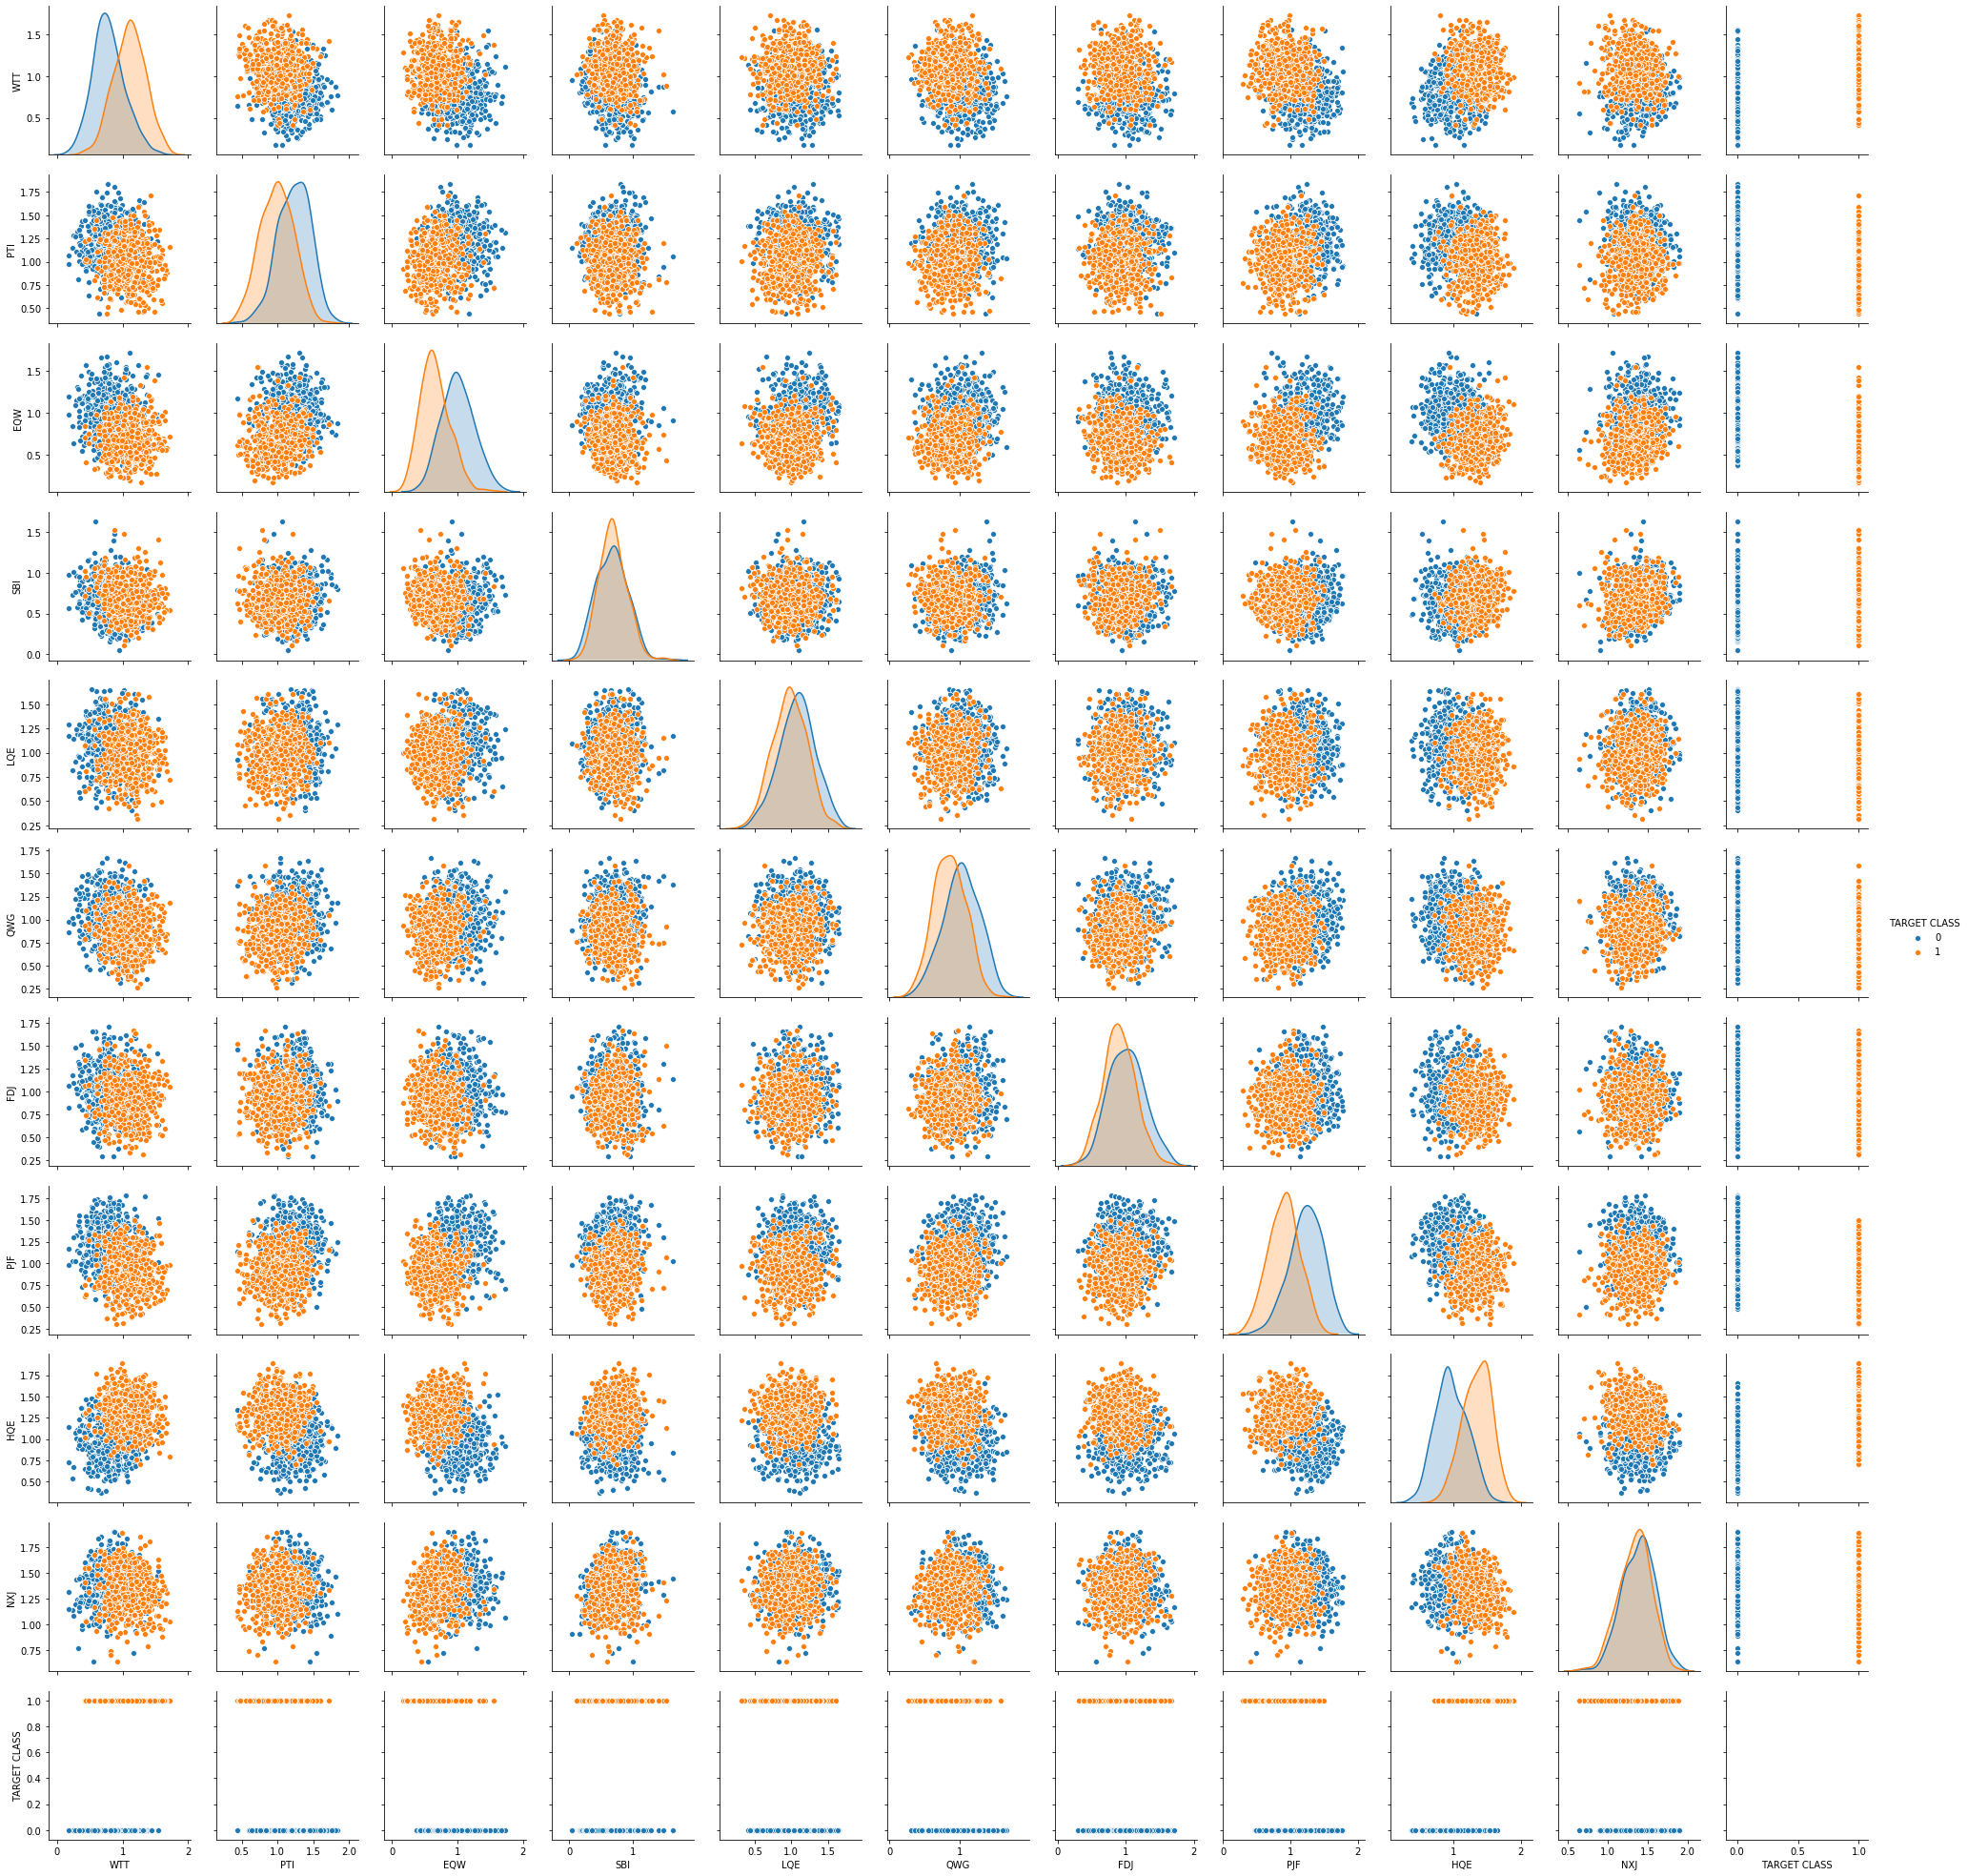

In [46]:
# Data Visualization

sns.pairplot(df,hue="TARGET CLASS")

**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(df_sf,y,test_size=0.3)


**Use KNN Algorithm**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

**Performance Evalution**

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))

[[131  18]
 [  9 142]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       149
           1       0.89      0.94      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



**Determining K Value**

In [0]:
error_rate = []

for i in range(1,40): 
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  y_pred_i = classifier.predict(X_test)
  error_rate.append(np.mean(y_pred_i != y_test))


Text(0, 0.5, 'Error Rate')

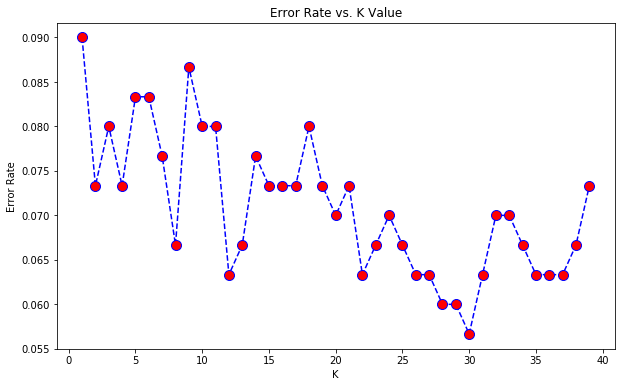

In [52]:
# Plot the Error Rate vs K Value Graph

plt.figure(figsize=(10,6))

plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [53]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[131  18]
 [  9 142]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       149
           1       0.89      0.94      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [55]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[137  12]
 [  5 146]]


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       149
           1       0.92      0.97      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

